##### Advanced Statistical Analysis and Model-Based Learning (Fall 2024-2025)
# Home Assignment 2

#### Topics:
- Probability review
- Normal, Chi-Squared, t, and F distributions
- Distributional Properties of the Linear Model
- Solving LS using SVD

#### Due: 9/12/2024 by 18:30


#### Instructions:
- Write your IDs and date at the top cell.
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding exercises.
- For theoretic exercises, you can either write your solution in the notebook using $\LaTeX$ (preffered) or submit additional notes.


**ID1**: 305674731

**ID2**: 209028067

**Date**: 15/12/24

<hr>
<hr>

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List
from scipy.stats import norm, chi2, t, f
import scipy.stats as stats
sns.set(style='whitegrid')

## Problem 1 (Conditional Expectation)
Let $X$ and $Y$ be two random variables with a probability model $P_{X,Y}$. Let $m : \mathbb R \to \mathbb R$ such that $m(X)$ and $f(X)$ are random variables with finite variance. Suppose that $m(X)$ satisfies the "orthogonality principle": for any function $f : \mathbb R \to \mathbb R$ such that $f(X)$ is a random variable,
$$
\mathbb E \left[\left(Y - m(X) \right) f(X) \right] = 0.
$$
Namely, the error in predicting the target is ``orthogonal'' to the data. Prove that
$$
\mathbb E \left[\left(Y - m(X) \right)^2 \right] \leq \mathbb E \left[ \left(Y - f(X) \right)^2 \right].
$$

We want to prove that:

$$
\mathbb E \left[\left(Y - m(X) \right)^2 \right] \leq \mathbb E \left[ \left(Y - f(X) \right)^2 \right]
$$

$$
△=\mathbb E \left[\left(Y - m(X) \right)^2 \right] - E \left[ \left(Y - f(X) \right)^2 \right] \leq \mathbb 0.
$$
\
Let look at the squared terms:
$$(Y-f(x))^2=Y^2-2Yf(x)+f(x)^2 $$
$$(Y-m(x))^2 = Y^2 -2Ym(x)+m(x)^2 $$

Back to △:
$$
△= E [Y^2-2Yf(x)+f(x)^2] - E[Y^2 -2Ym(x)+m(x)^2]
$$
\
From the linearity of expectation:
$$
△= E [-2Yf(x)+f(x)^2+2Ym(x)-m(x)^2]= E[-2Y(f(x)-m(x))+(f(x)^2-m(x)^2)] =
E[-2Y(f(x)-m(x))+(f(x)-m(x))(f(x)+m(x))] = E[-2Y(f(x)-m(x)] + E[(f(x)-m(x))(f(x)+m(x))] = E[(m(x)-f(x))(-2Y+m(x)+f(x))]
$$



\
We know that $m(x)$  satisfies the "orthogonality principle" which means that:
$$E[(Y-m(x))h(x)]=0$$

for any function $h(x)$, including $$f(x)-m(x)=h(x)$$

This means that : $$E[(Y-m(x))(f(x)-m(x))]=0$$

Rewriting (1):
$$E[Y(f(x)-m(x))] = E[m(x)(f(x)-m(x))]  $$

Back to △ where the tearm and use (1):

$$ E[-2Y(m(x)-f(x))]=E[-2m(x)(f(x)-m(x))] $$

$$ E[(m(x)-f(x))(-2m(x)+m(x)+f(x))]=E[(m(x)-f(x))(f(x)-m(x))]= E[-(m(x)-f(x))^2)] = - E[(m(x)-f(x))^2] $$

\
Since $ 0 \leq (m(x)-f(x))^2$ we get that:
$$ - E[(m(x)-f(x))^2] \leq 0 $$

Thus:

$$
\mathbb E \left[\left(Y - m(X) \right)^2 \right] \leq \mathbb E \left[ \left(Y - f(X) \right)^2 \right]
$$




---



---



## Problem 2 (Sampling from $\mathcal N(0,1)$, $\chi^2$, $t$, and $F$)
In the following exercise, you can only sample using repeated calls to ``random.random()``.
You can use the ``scipy.stats`` package *only* to illustrate PDFs. You should illustrate histograms with number of bins about 5%-10% of the number of samples $n=1,000$ in the input to the histogram. For example, use $100$ bins equally spaced between the range of the samples, so that you'll get a nice comparison between the empirical distribution and the theoretical distribution represented by the PDF. Make sure that the histogram is normalized to approximate the density of the simulated random variable. Set the seed ``random.seed(my_id)`` where ``my_id`` is your ID number with leading zeros removed.

1. Implement the functions ``sample_unif``, ``sample_normal_clt``, and ``sample_normal``. Illustrate the histogram of $1000$ samples from ``sample_normal_clt`` and $1000$ samples from ``sample_normal``. Choose the input to ``sample_normal_clt`` so that the two histogram look alike.
2. Implement the functions ``sample_chisq``, ``sample_t``, and ``sample_f``. You should use ``sample_normal`` repeatedly.
3. Use ``sample_normal`` to sample $1000$ times from $\mathcal N(0,1)$ and use one figure to illustrate the histogram of the samples and the true PDF of $\mathcal N(0,1)$
4. Use ``sample_chisq`` to sample $1000$ times from $\chi^2_k$ and use one figure to illustrate the histogram of the samples and the true PDF of $\chi^2_k$; for $k=5$ and $k=10$.
5. Use ``sample_t`` to sample $1000$ times from $t_k$ (the $t$-distribution with $k$ degrees of freedom) and use one figure to illustrate the histogram of the samples and the true PDF of $t_k$; for $k=5$ and $k=10$.
6. Use ``sample_F`` to sample $1000$ times from $F_{k_1,k_2}$ and use one figure to illustrate the histogram of the samples and the true PDF of $F_{k_1,k_2}$; for $(k_1, k_2)= (10,5)$ and $(k_1, k_2)= (50,45)$.

In [ ]:
def sample_unif(n: int) -> float:
    """
    n independent samples from the uniform distribution over (0,1)
    """

    return [random.random() for _ in range(n)]


def sample_normal_clt(n: int) -> float:
    """
    Use the CLT to approximately sample from the standard normal distribution

    Args:
        n:    number of samples from a non-normal distribution

    Returns:
        z:    a random sample, approximately from the standard normal distribution

    """
    mean_u = 0.5
    std_dev_u = np.sqrt(1/12)
    samples = np.array(sample_unif(n))
    z = (samples.mean() - mean_u) / (std_dev_u/np.sqrt(n))
    return z


def sample_normal() -> float:
    """
    Sample from the standard normal distribution using a single sample
    from the uniform distribution. You should use the normal quantile function
    ``norm.ppf``

    Return:
        z:    a random sample from the standard normal distribution

    """

    z = norm.ppf(sample_unif(1)[0])
    return z


def sample_chisq(k: int) -> float:
    """
    Sample from the chisquared distribution with k degrees of freedom

    Args:
        k:    number of degrees of freedom (DoF)

    Return:
        x:    random sample from the chisquared distribution with k degrees of freedom

    """

    z_samples = np.array([sample_normal() for _ in range(k)])
    x = np.sum(z_samples**2)
    return x


def sample_t(k: int) -> float:
    """
    Sample from the t distribution with k degrees of freedom

    Args:
        k:    number of degrees of freedom

    Return:
        x:    random sample from the t distribution

    """

    z = sample_normal()
    v = sample_chisq(k)
    x = z / np.sqrt(v / k)
    return x


def sample_f(k1: int, k2:int) -> float:
    """
    Sample from the F distribution with k1 over k2 degrees of freedom

    Args:
        k1:    number of degrees of freedom numerator
        k2:    number of degrees of freedom denominator

    Return:
        x:    random sample from the F distribution

    """

    v1 = sample_chisq(k1)
    v2 = sample_chisq(k2)
    x = (v1 / k1) / (v2 / k2)
    return x

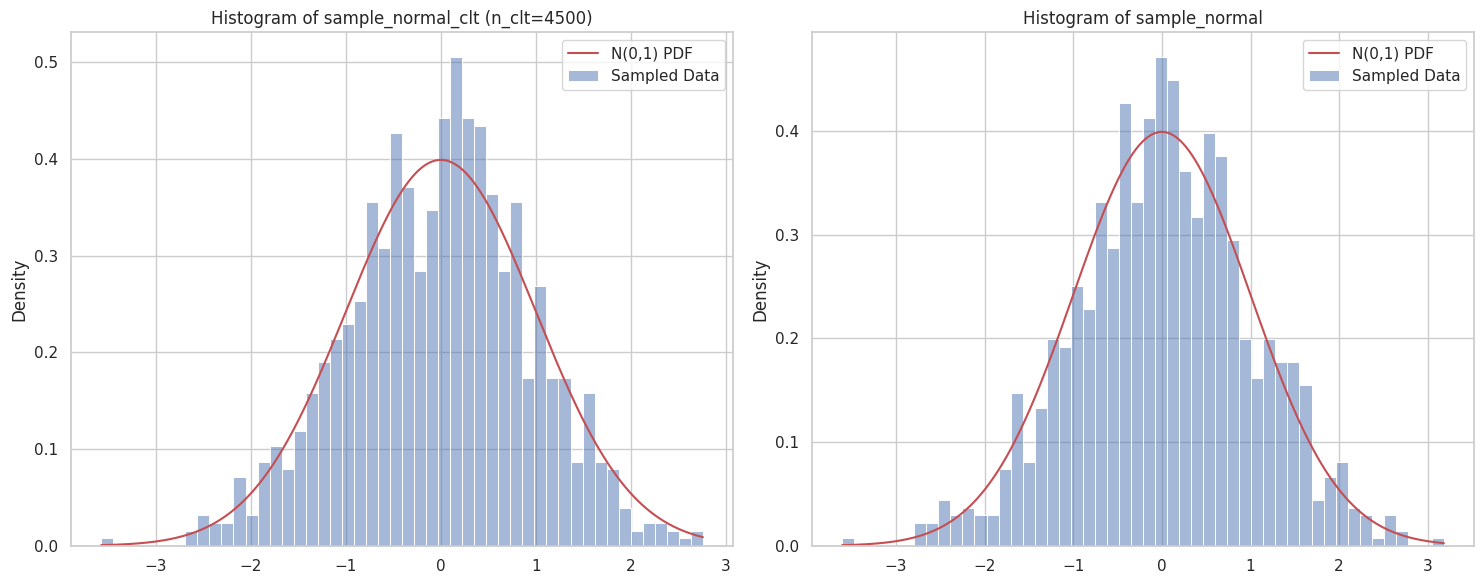

In [ ]:
MY_ID = 305674731 # your personal ID number with leading zeros removed
random.seed(MY_ID)

# 1. Illustrate the histogram of 1000 samples from sample_normal_clt and sample_normal
n_samples = 1000
n_clt = 4500

def determine_bins(n_samples: int, percentage: float = 0.05) -> int:
    return max(10, int(n_samples * percentage))

# Function to plot histogram
def plot_histogram_with_pdf(samples: List[float], dist, params: dict, ax, title: str, label_pdf: str = 'PDF', bin_percentage: float = 0.05):
    n_bins = determine_bins(len(samples), percentage=bin_percentage)
    sns.histplot(samples, bins=n_bins, stat='density', alpha=0.5, ax=ax, label='Sampled Data')
    x = np.linspace(min(samples), max(samples), 1000)
    y = dist.pdf(x, **params)
    ax.plot(x, y, 'r', label=label_pdf)
    ax.set_title(title)
    ax.legend()

# 1. Illustrate the histogram of 1000 samples from sample_normal_clt and sample_normal
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Generate samples
samples_normal_clt = [sample_normal_clt(n_clt) for _ in range(n_samples)]
samples_normal = [sample_normal() for _ in range(n_samples)]

# Plot sample_normal_clt with a higher bin percentage for smoother histogram
plot_histogram_with_pdf(
    samples_normal_clt,
    norm,
    {'loc': 0, 'scale': 1},
    axs[0],
    f'Histogram of sample_normal_clt (n_clt={n_clt})',
    label_pdf='N(0,1) PDF',
    bin_percentage=0.05
)

# Plot sample_normal with default bin percentage (5%)
plot_histogram_with_pdf(
    samples_normal,
    norm,
    {'loc': 0, 'scale': 1},
    axs[1],
    'Histogram of sample_normal',
    label_pdf='N(0,1) PDF',
    bin_percentage=0.05
)

plt.tight_layout()
plt.show()

In [ ]:
# 2. Implement sample_chisq, sample_t, and sample_f functions
# Already implemented above using sample_normal()

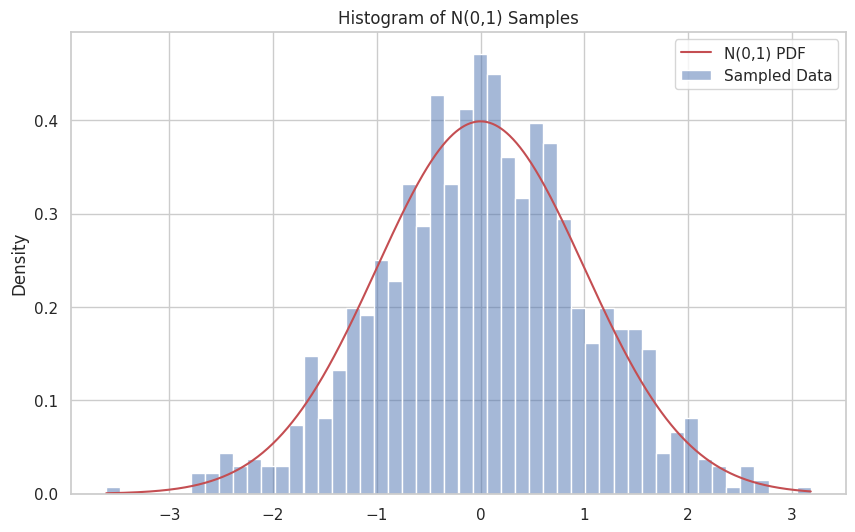

In [ ]:
# 3. Sample from N(0,1) and illustrate histogram with true PDF
plt.figure(figsize=(10,6))
plot_histogram_with_pdf(
    samples_normal,
    norm,
    {'loc': 0, 'scale': 1},
    plt.gca(),
    'Histogram of N(0,1) Samples',
    label_pdf='N(0,1) PDF',
    bin_percentage=0.05
)
plt.show()

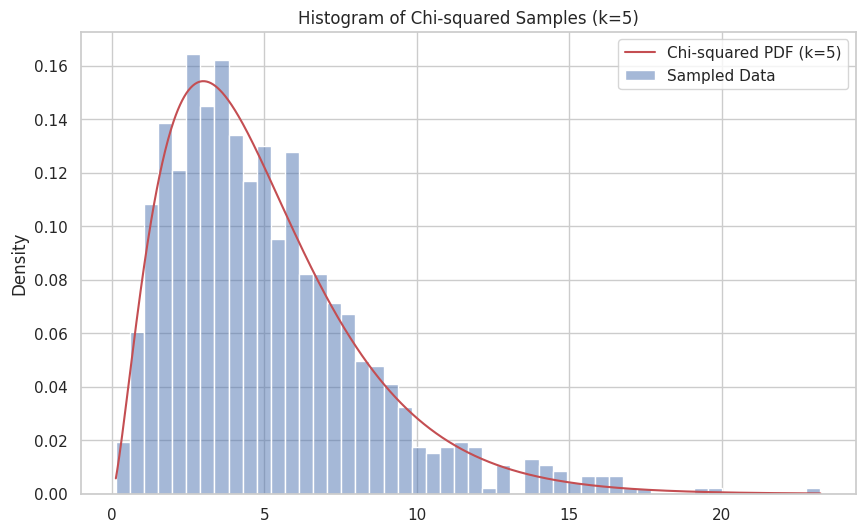

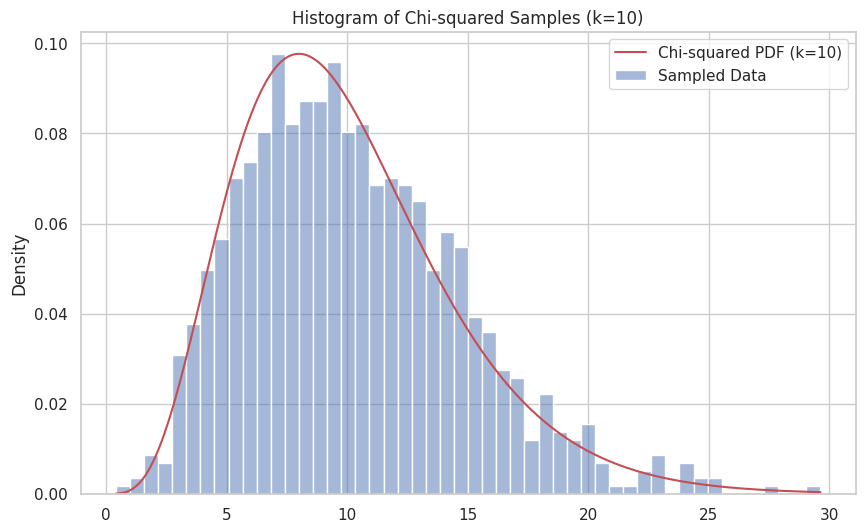

In [ ]:
for k in [5, 10]:
    samples_chisq = [sample_chisq(k) for _ in range(n_samples)]
    plt.figure(figsize=(10,6))
    plot_histogram_with_pdf(
        samples_chisq,
        chi2,
        {'df': k},
        plt.gca(),
        f'Histogram of Chi-squared Samples (k={k})',
        label_pdf=f'Chi-squared PDF (k={k})',
        bin_percentage=0.05
    )
    plt.show()

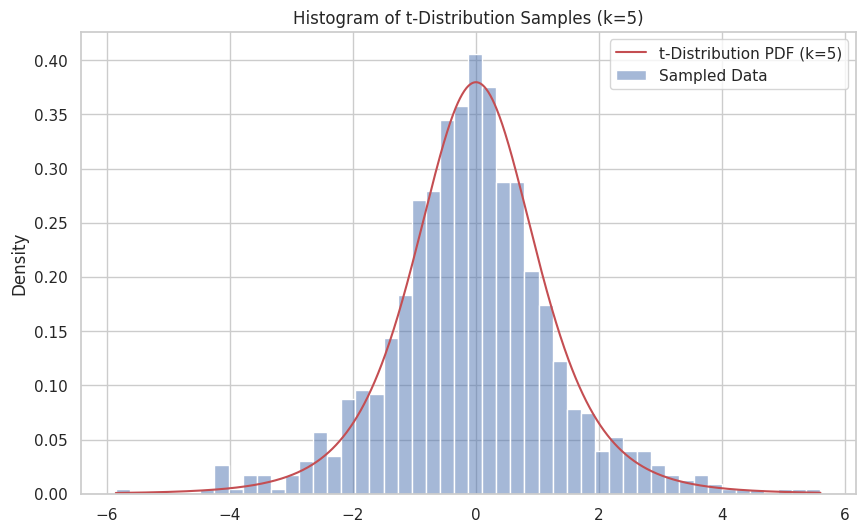

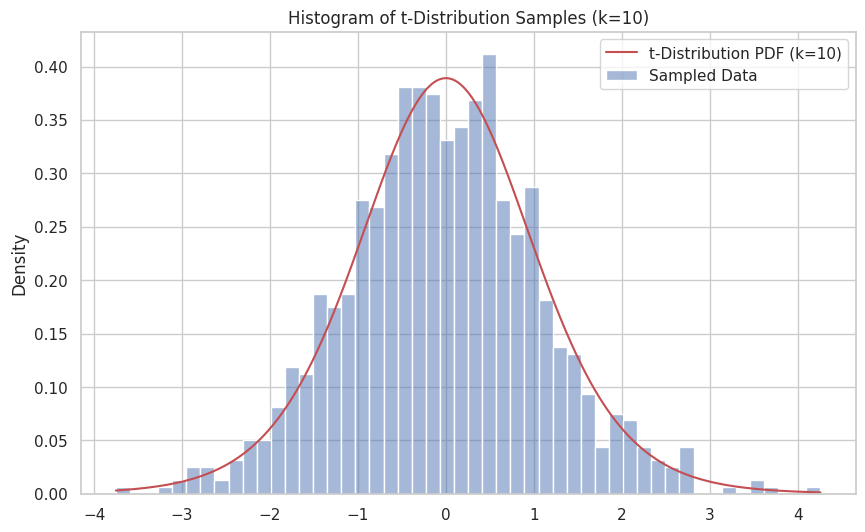

In [ ]:
for k in [5, 10]:
    samples_t = [sample_t(k) for _ in range(n_samples)]
    plt.figure(figsize=(10,6))
    plot_histogram_with_pdf(
        samples_t,
        t,
        {'df': k},
        plt.gca(),
        f'Histogram of t-Distribution Samples (k={k})',
        label_pdf=f't-Distribution PDF (k={k})',
        bin_percentage=0.05
    )
    plt.show()

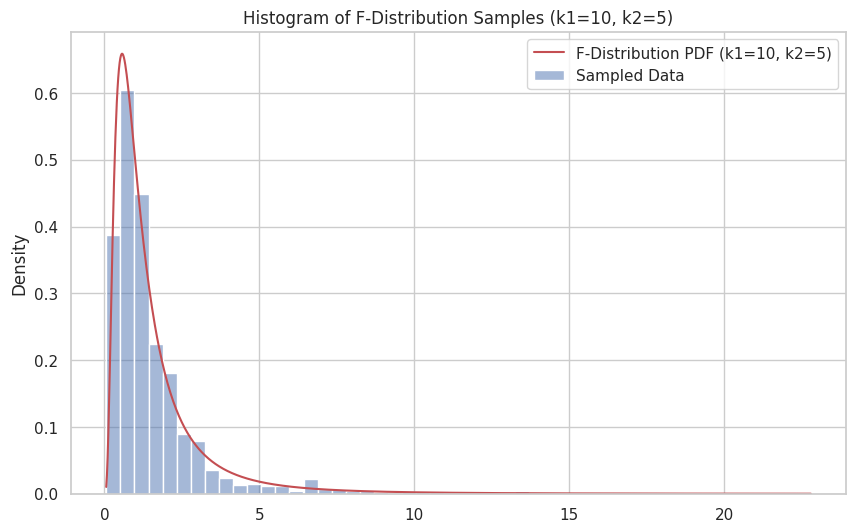

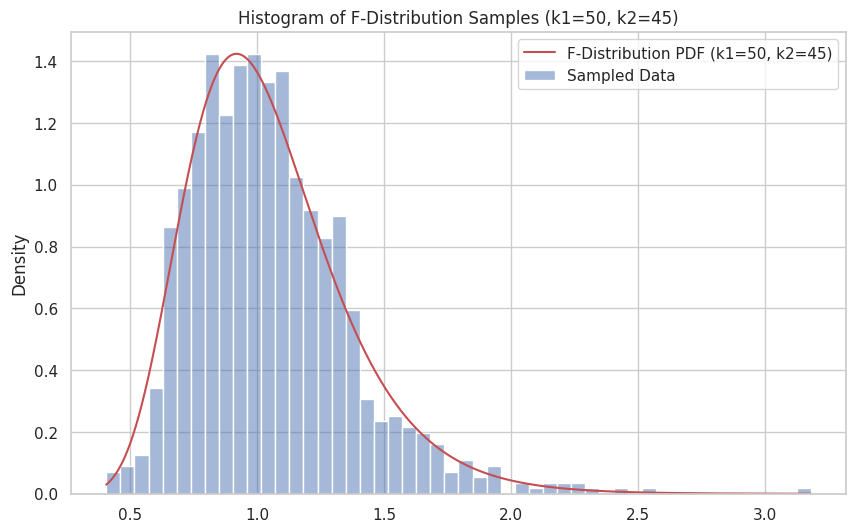

In [ ]:
# 6. Sample from F-distribution and illustrate histograms with true PDFs for (k1,k2)=(10,5) and (50,45)
for k1, k2 in [(10, 5), (50, 45)]:
    samples_f = [sample_f(k1, k2) for _ in range(n_samples)]
    plt.figure(figsize=(10,6))
    plot_histogram_with_pdf(
        samples_f,
        f,
        {'dfn': k1, 'dfd': k2},
        plt.gca(),
        f'Histogram of F-Distribution Samples (k1={k1}, k2={k2})',
        label_pdf=f'F-Distribution PDF (k1={k1}, k2={k2})',
        bin_percentage=0.05
    )
    plt.show()



---



---



## Problem 3 (The Normal Distribution)

(1) Let $Z = (Z_1,\ldots,Z_9)^\top \sim \mathcal N(\mu, I_9)$ where $\mu \in \reals^9$. Show that $3Z_1-Z_2+Z_3-Z_4$ is independent of $Z_1 + Z_2 - Z_3 + Z_4 - Z_5$.


---


(2) Suppose that $Z \sim \mathcal N(\mu, I_n)$ and let $X = a^\top Z$ and $Y = B^\top Z$ for a non-random vectors $a \in \mathbb R^n$ and a non-random matrix $B \in \mathbb R^{n \times p}$. Find conditions on $a$ and $B$ such that $X$ is independent of $Y$.


---


(3) Suppose that $Z_{ij} \overset{iid}{\sim} \mathcal N(0, 1)$ for $i= 1,\ldots,I$ and $j=1,\ldots,J$. Define
$$
\bar{Z}_{i\bullet} := \frac{1}{J} \sum_{j=1}^J Z_{ij},\qquad \bar{Z}_{\bullet j} := \frac{1}{I} \sum_{i=1}^I Z_{ij}, \qquad \bar{Z}_{\bullet \bullet} := \frac{1}{IJ} \sum_{j=1}^J \sum_{i=1}^I Z_{ij}
$$

- Is $\bar{Z}_{i\bullet}$ independent of $\bar{Z}_{\bullet j}$ ?
- Is $\bar{Z}_{1\bullet}$ independent of $\bar{Z}_{2\bullet}$ ?
- Is $\bar{Z}_{i\bullet} - \bar{Z}_{\bullet \bullet}$ independent of $\bar{Z}_{i\bullet}$ ?


---


(4) Consider the variance-covariance matrix
$$
\bar{\Sigma} = \begin{bmatrix} 1 & -.25 \\
-.25 & 1
\end{bmatrix}
$$
Using as many samples as you need from the standard normal distribution (e.g. ``numpy.random.randn``), generate $N = 1000$ independent samples from the bivariate normal distribution $\mathcal N(0, \bar{\Sigma})$ (you'll get $N$ pairs). Illustrate these samples over a scatter plot.

---


(5) Consider the region in $\reals^2$:
$$
A = \{ (x,y)\,: 0 \leq x \leq 1, 2x \leq y \leq 3\}
$$
For $(X_1, X_2) \sim \mathcal N(0, \bar{\Sigma})$, estimate
$$
\Pr\left[ (X_1, X_2) \in A \right]
$$
in two ways:
    1. Evaluating the integral over the Gaussian density function **numerically**. Set the number of grid points $G$ in every axis to be at least $500$.
    2. Estimating the fraction of samples in 4 that falls in the region $A$


(1)

Given $$Z = (Z_1,Z_2,...,Z_9)^T ∼ \mathcal N(μ,I_9) $$
We need to show that $3Z_1-Z_2+Z_30Z_4$ is independent of $Z_1+Z_2-Z_3+Z_4-Z_5 $

For simplicity, we will denote the equations as follows:

$$ U = 3Z_1+Z_3+Z_4 $$
$$ V = Z_1+Z_2-Z_3+Z_4-Z_5 $$  

And since U,V are linear combinations of $Z$ we can write them as:

$$ U=αZ \ , \ V=βZ $$
where $$α=(3,-1,1,-1,0,0,0,0,0)^T$$
$$ \beta = (1,1,-1,1,-1,0,0,0,0)^T $$

Let's calculate the COV of U,V:

$$COV(U,V) = α^TCOV(Z)β= α^TI_9β=α^Tβ=3*1-1-1-1=0 $$

Since the covariance is 0, U and V uncorrelated, and since Z is normal distributed --> U,V are independent.  



(2)

Given $$Z = (Z_1,Z_2,...,Z_9)^T ∼ \mathcal N(μ,I_9) $$
$$X = α^TZ \ , \ Y = B^TZ $$

We need to find conditions for $B$ and $α$ such that X,Y are independent.  

$$Cov(X,Y) = Cov(α^TZ,B^TZ) = α^TCov(Z)B = α^TI_nB = α^TB $$

For X and Y to be indipendent,Cov(X,Y) needs to be zero.

That means that our condition is: $ α^TB =0$

This condition means that $α$ must be orthoginal to each column in $B$.

(3.1)

To test independence we calc the cov


$$Cov(\bar{Z̄}_{i\bullet}\ , \ \bar{Z̄}_{j\bullet}) =
Cov(\frac{1}{J} \sum_{k=1}^J Z_{ik} \ , \ \frac{1}{I} \sum_{l=1}^I Z_{lj}) = \frac{1}{IJ}\sum_{j=1}^J\sum_{i=1}^ICov( Z_{ik} \ , \  Z_{lj})$$

$ \ $
Note:

- If $ Z_{ik} = Z_{lj} $ -- > $ Cov( Z_{ik} \ , \  Z_{lj}) = 1 $  Since $Z_{ij} \overset{iid}{\sim} \mathcal N(0, 1)$


- else: $Cov( Z_{ik} \ , \  Z_{lj}) = 0$ since they are independent (from the assumption of i.i.d. normal random variables).

- This mean that the covariance terms equal 1 only when $i=k$ and $j=l$

$ \ $

Going back to the original claulction:

$$ \frac{1}{IJ}\sum_{j=1}^J\sum_{i=1}^ICov( Z_{ij} \ , \  Z_{ij}) =
\frac{1}{IJ}Var(Z_{ij})= \frac{1}{IJ} *1 = \frac{1}{IJ} $$

That confirms that $\bar{Z̄}_{i\bullet}\ , \ \bar{Z̄}_{j\bullet}$ **are not independent** because their covariance is not zero.

(3.2)

Both $\bar{Z}_{1\bullet}$ $\bar{Z}_{2\bullet}$ are means of i.i.d. normal random variables.

Specifically we can say that $Z_{1\bullet} \overset{iid}{\sim} \mathcal N(0, \frac{1}{J}) $ and $Z_{2\bullet} \overset{iid}{\sim} \mathcal N(0, \frac{1}{J}) $

$$Cov(\bar{Z}_{1\bullet}\ , \ \bar{Z}_{2\bullet})=
Cov(\frac{1}{J}\sum_{j=1}^JZ_{1j} \ , \ \frac{1}{J}\sum_{j=1}^JZ_{2j})=
\frac{1}{J^2}\sum_{j=1}^JCov(Z_{1j},Z_{2j}) =
\frac{1}{J^2}\sum_{j=1}^J0 = 0$$


We can say that also from the fact that the terms $Z_{ij}$ and $Z_{2j}$ are independent for all j since $Z_{ij} \overset{iid}{\sim} \mathcal N(0, 1)$. Linear combinations of independent Gaussian variables remain independent.

$ \ $

From the explantion above and the fact that $Cov(\bar{Z}_{1\bullet}\ , \ \bar{Z}_{2\bullet})= 0$ we can conclude that $\bar{Z}_{1\bullet}$ and  $\bar{Z}_{2\bullet}$ are independent


(3.3)

$\bar{Z}_{i\bullet}= \frac{1}{J}\sum_{j=1}^JZ_{ij}$

$\bar{Z}_{\bullet\bullet}= \frac{1}{IJ}\sum_{i=1}^I\sum_{j=1}^JZ_{ij}$

$\bar{Z}_{i\bullet} - \bar{Z}_{\bullet\bullet} =
\frac{1}{J}\sum_{j=1}^JZ_{ij} - \frac{1}{IJ}\sum_{i=1}^I\sum_{j=1}^JZ_{ij}=
\frac{1}{J}\sum_{j=1}^JZ_{ij} - \frac{1}{J}\sum_{i=1}^I\sum_{j=1}^JZ_{ij}
$

$ \ $


$$Cov(\bar{Z}_{i\bullet} \ ,\ \bar{Z}_{i\bullet} - \bar{Z}_{\bullet\bullet})=
Var(\bar{Z}_{i\bullet}) - Cov(\bar{Z}_{i\bullet} \ , \  \bar{Z}_{\bullet\bullet})$$

Let's clac each part separately:

$$Var(\bar{Z}_{i\bullet}) = \frac{1}{J^2}∑Var(Z_{ij}) = \frac{1}{J^2}*j = \frac{1}{J}$$

 $$ Cov(\bar{Z}_{i\bullet} \ , \  \bar{Z}_{\bullet\bullet}) =
 Cov(\frac{1}{J}\sum_{j=1}^JZ_{ij} \ , \ \frac{1}{IJ}\sum_{i=1}^I\sum_{j=1}^JZ_{ij}) =
 \frac{1}{J} \frac{1}{IJ}\sum_{j=1}^J\sum_{i'=1}^I\sum_{j'=1}^JCov(Z_{ij} \ ,\ Z_{i'j'}) $$

 - If $(i,j)=(i',j')$ : $Cov(Z_{ij} \ ,\ Z_{i'j'}) = Var(Z_{ij})=1$
 - else: $Cov(Z_{ij} \ ,\ Z_{i'j'}) = 0$ from independence
 - Thus, the only nonzero terms in the triple sum are those where $ i = i'$ and $ j = j'$
 - Lets fix $ i = i'$, since $\bar{Z}_{i\bullet}$ refers to a specific row mean.
 - The nonzero terms occur when $j=j'$ which happens J times.

 $$ Cov(\bar{Z}_{i\bullet} \ , \  \bar{Z}_{\bullet\bullet}) =
 \frac{1}{J} \frac{1}{IJ}\sum_{j=1}^J1 =
 \frac{1}{IJ} $$

Now we can combine the results:
$$Cov(\bar{Z}_{i\bullet} \ ,\ \bar{Z}_{i\bullet} - \bar{Z}_{\bullet\bullet}) =
\frac{1}{J} - \frac{1}{IJ} \neq 0 $$

The covariance calculation explicitly shows dependence.



(4)

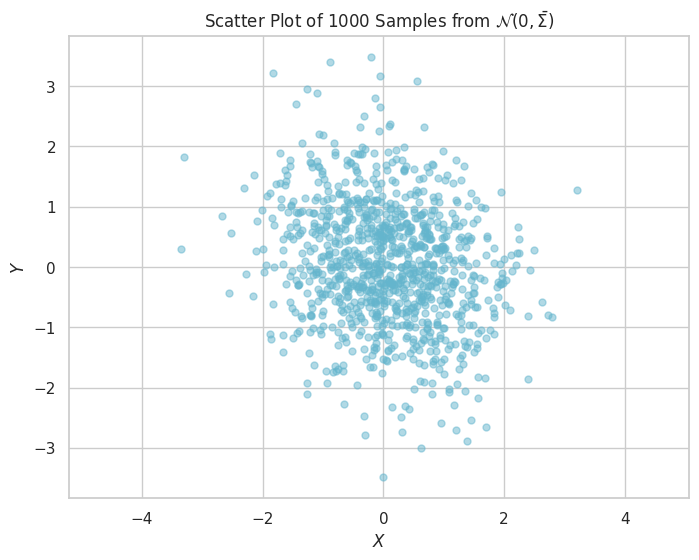

In [ ]:
# Define the variance-covariance matrix
cov_matrix = np.array([[1, -0.25], [-0.25, 1]])

# Generate N = 1000 samples from the bivariate normal distribution
N = 1000
mean = [0, 0]  # Mean vector
samples = np.random.multivariate_normal(mean, cov_matrix, N)

# Extract x and y for plotting
x, y = samples[:, 0], samples[:, 1]

# Correct the LaTeX in the title
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5, s=25, color = 'c')
plt.title(r"Scatter Plot of 1000 Samples from $\mathcal{N}(0, \bar{\Sigma})$")
plt.xlabel("$X$")
plt.ylabel("$Y$")
plt.grid(True)
plt.axis('equal')
plt.show()



(5.1)

In [ ]:
mean = [0, 0]
cov_matrix = [[1, -0.25], [-0.25, 1]]

# Gaussian density
true_density = stats.multivariate_normal(mean=mean, cov=cov_matrix)

# region bounds
x_bounds = (0, 1)
y_bounds = (lambda x: 2 * x, lambda x: 3)

In [ ]:
def numerical_integration_density(true_density, x_bounds, y_bounds, G=500):
    """
    Numerically compute the integral of a bivariate density over a given region.

    Parameters:
    - true_density: A `scipy.stats.multivariate_normal` object representing the PDF.
    - x_bounds: Tuple (x_lower, x_upper) defining the bounds for x.
    - y_bounds: Tuple (y_lower_func, y_upper_func) defining y bounds as functions of x.
    - G: Number of grid points.

    Returns:
    - Estimated probability as a float.
    """
    x_lower, x_upper = x_bounds
    y_lower_func, y_upper_func = y_bounds

    # create grid points
    x = np.linspace(x_lower, x_upper, G)
    dx = (x_upper - x_lower) / G

    # init probability
    total_prob = 0

    for xi in x:
        # define y bounds for current x
        y_lower = y_lower_func(xi)
        y_upper = y_upper_func(xi)
        y = np.linspace(y_lower, y_upper, G)
        dy = (y_upper - y_lower) / G

        # eval PDF at grid points
        grid_points = np.array([[xi, yi] for yi in y])
        pdf_values = true_density.pdf(grid_points)

        # accumulate probability
        total_prob += np.sum(pdf_values) * dx * dy

    return total_prob

def sampling_probability(samples, region_func):
    """
    Estimate the probability of samples falling within a given region.

    Parameters:
    - samples: Array of shape (N, 2) with bivariate samples.
    - region_func: Function that checks if (x, y) is in the region.

    Returns:
    - Fraction of samples in the region as a float.
    """
    # apply the region function to all samples
    in_region = np.apply_along_axis(region_func, 1, samples)

    # calc the fraction of samples in the region
    return np.mean(in_region)


def region_func(point):
    x, y = point
    return (0 <= x <= 1) and (2 * x <= y <= 3)

In [ ]:
# generate 1000 samples from N(0, Σ)
samples = np.random.multivariate_normal(mean, cov_matrix, 1000)

# numerical Integration
numerical_probability = numerical_integration_density(true_density, x_bounds, y_bounds, G=500)

# sampling Estimate
sampled_probability = sampling_probability(samples, region_func)

# res
print("Estimated probability via numerical integration:", numerical_probability)
print("Estimated probability via sampling:", sampled_probability)

Estimated probability via numerical integration: 0.06427963401309784
Estimated probability via sampling: 0.056




---



---



## Problem 4 (Conditional Distribution)
For
$$
\begin{bmatrix}
X \\
Y \\
Z
\end{bmatrix} \sim \mathcal N\left( \begin{bmatrix} 1 \\
2\\
3
\end{bmatrix}, \begin{bmatrix}
 4 & -1 & 3 \\
 -1 & 2 & -3 \\
 3 & -3 & 8
\end{bmatrix}
\right)
$$
find (numerically):
1. The distribution of $X$ given that $Y = 1$.
2. The joint distribution of $X$ and $Y$ given $Z = 1$.
3. The distribution of $Y$ given that $Z = 2$ and $X = 3$.
4. $Pr(Y \in [-1,1] | Z=4, X=3)$


In [ ]:
from scipy.stats import norm, multivariate_normal

mu = np.array([1,2,3])
Sigma = np.array([[ 4, -1,  3],
                  [-1,  2, -3],
                  [ 3, -3,  8]])

# 1) Distribution of X given Y=1
mu_X, mu_Y = mu[0], mu[1]
Sigma_XX = Sigma[0,0]
Sigma_YY = Sigma[1,1]
Sigma_XY = Sigma[0,1]
Sigma_YX = Sigma[1,0]
y_val = 1

cond_mean_1 = mu_X + (Sigma_XY / Sigma_YY) * (y_val - mu_Y)
cond_var_1 = Sigma_XX - (Sigma_XY * Sigma_YX) / Sigma_YY

# 2) Joint distribution of (X,Y) given Z=1
mu_XY = mu[[0,1]]
mu_Z  = mu[2]
z_val = 1

Sigma_XY_mat = Sigma[np.ix_([0,1],[0,1])]
Sigma_Z_mat  = Sigma[2,2].reshape((1,1))
Sigma_XY_Z = Sigma[np.ix_([0,1],[2])]
Sigma_Z_XY = Sigma[np.ix_([2],[0,1])]

Sigma_Z_inv = np.linalg.inv(Sigma_Z_mat)

cond_mean_2 = mu_XY + Sigma_XY_Z.dot(Sigma_Z_inv).dot(z_val - mu_Z)
cond_cov_2 = Sigma_XY_mat - Sigma_XY_Z.dot(Sigma_Z_inv).dot(Sigma_Z_XY)

# 3) Distribution of Y given Z=2 and X=3
x_val = 3
z_val = 2

mu_Y  = mu[1]
mu_XZ = mu[[0,2]]

Sigma_YY_mat = Sigma[1,1].reshape((1,1))
Sigma_XZ_mat = Sigma[np.ix_([0,2],[0,2])]
Sigma_YXZ = Sigma[np.ix_([1],[0,2])]  # (1x2)
Sigma_XZY = Sigma[np.ix_([0,2],[1])]  # (2x1)

Sigma_XZ_inv = np.linalg.inv(Sigma_XZ_mat)

xz_val = np.array([x_val, z_val])
diff_xz = xz_val - mu_XZ

cond_mean_3 = mu_Y + Sigma_YXZ.dot(Sigma_XZ_inv).dot(diff_xz)
cond_var_3 = Sigma_YY_mat - Sigma_YXZ.dot(Sigma_XZ_inv).dot(Sigma_XZY)

# Convert these 1x1 arrays to scalars
cond_mean_3 = cond_mean_3.item()
cond_var_3 = cond_var_3.item()

# 4) Pr(Y in [-1,1] | Z=4, X=3)
z_val = 4
x_val = 3
xz_val = np.array([x_val, z_val])
diff_xz = xz_val - mu_XZ

cond_mean_4 = mu_Y + Sigma_YXZ.dot(Sigma_XZ_inv).dot(diff_xz)
cond_var_4 = Sigma_YY_mat - Sigma_YXZ.dot(Sigma_XZ_inv).dot(Sigma_XZY)

# Convert to scalars
cond_mean_4 = cond_mean_4.item()
cond_var_4 = cond_var_4.item()
cond_std_4 = np.sqrt(cond_var_4)

p_interval = norm.cdf((1 - cond_mean_4)/cond_std_4) - norm.cdf((-1 - cond_mean_4)/cond_std_4)

# Results
print("-----------------------------------------------------------------")
print("1) X|Y=1 ~ N(mean={}, var={})".format(cond_mean_1, cond_var_1))
print("-----------------------------------------------------------------")
print("2) (X,Y)|Z=1 ~ N(mean={}, cov={})".format(cond_mean_2, cond_cov_2))
print("-----------------------------------------------------------------")
print("3) Y|X=3,Z=2 ~ N(mean={}, var={})".format(cond_mean_3, cond_var_3))
print("-----------------------------------------------------------------")
print("4) Pr(Y in [-1,1] | X=3,Z=4) = {}".format(p_interval))
print("-----------------------------------------------------------------")

-----------------------------------------------------------------
1) X|Y=1 ~ N(mean=1.5, var=3.5)
-----------------------------------------------------------------
2) (X,Y)|Z=1 ~ N(mean=[[0.25 1.25]
 [1.75 2.75]], cov=[[2.875 0.125]
 [0.125 0.875]])
-----------------------------------------------------------------
3) Y|X=3,Z=2 ~ N(mean=2.4782608695652173, var=0.8695652173913044)
-----------------------------------------------------------------
4) Pr(Y in [-1,1] | X=3,Z=4) = 0.2259110182520692
-----------------------------------------------------------------


## Explanation:
###1. For $X|Y=1$:

$
X|Y=1 \sim \mathcal{N}\left(\mu_X + \frac{\Sigma_{XY}}{\Sigma_{YY}}(1-\mu_Y), \; \Sigma_{XX} - \frac{\Sigma_{XY}\Sigma_{YX}}{\Sigma_{YY}}\right).
$

Plugging in values:
$
\mu_X = 1, \quad \mu_Y=2, \quad \Sigma_{XX}=4, \;\Sigma_{YY}=2,\;\Sigma_{XY}=-1.
$

So:
$
E[X|Y=1] = 1 + \frac{-1}{2}(1-2)=1+\frac{-1}{2}(-1)=1+\frac{1}{2}=1.5.
$
$
\mathrm{Var}(X|Y=1)=4 - \frac{(-1)(-1)}{2}=4-\frac{1}{2}=3.5.
$

Thus:
$
X|Y=1 \sim \mathcal{N}(1.5,3.5).
$

### 2. For $(X,Y)|Z=1$:

Partition into $(X,Y)$ and $Z$. Let $z=1$, $\mu_Z=3$, and from the covariance matrix:

$
\Sigma_{XY|Z} = \Sigma_{XY} - \Sigma_{XY,Z}\Sigma_{Z}^{-1}\Sigma_{Z,XY}.
$

We find:
$
(X,Y)|Z=1 \sim \mathcal{N}\left([0.25, \,2.75], \begin{bmatrix}2.875 & 0.125 \\0.125 &0.875\end{bmatrix}\right).
$

### 3. For $Y|X=3,Z=2$:

Let $(x,z)=(3,2)$, $(\mu_X,\mu_Z)=(1,3)$. The conditional mean and variance are computed as shown, yielding approximately:

$
Y|X=3,Z=2 \sim \mathcal{N}(2.47826087,\,0.86956522).
$

### 4. $P(Y \in [-1,1]|X=3,Z=4)$:

First find $Y|X=3,Z=4$:
$
Y|X=3,Z=4 \sim \mathcal{N}(1.69565217,0.86956522).
$

Then:
$
P(-1 \leq Y \leq 1)=\Phi\left(\frac{1 - 1.6957}{\sqrt{0.8696}}\right)-\Phi\left(\frac{-1 -1.6957}{\sqrt{0.8696}}\right) \approx 0.226.
$



---



---



## Problem 5 (Distributional Properties of the Least Squares Estiamte)
Consider a least squares model with one predictor $p=1$ without an intercept term, i.e. $y_i = \beta x_i + \epsilon_i$, $i=1,\ldots,n$.
1. Write the least squares solution $\hat{\beta} \in \mathbb R$ in terms of $x = (x_1,\ldots,x_n)^\top$ and $y = (y_1,\ldots,y_n)^\top$.
2. With $\hat{y}_i = \hat{\beta} x_i$ and $\hat{\epsilon}_i = y_i - \hat{y}_i$, show that
 - $\sum_{i=1}^n \hat{y}_i \hat{\epsilon}_i = 0$
 - $\|\hat{\epsilon}\|^2 = \|y\|^2 -  \|\hat{y}\|^2$
3. Suppose that $\epsilon_i \overset{iid}{\sim} N(0, 1)$.
 - What is the distribution of the random vector $[ \hat{\epsilon}~~ \hat{y}]^\top$?
 - What is the distribution of the random vector $[\hat{y}~~ \hat{\beta}]^\top$?
4. (bonus) Set $\|\epsilon\|_{\infty} := \max_{i=1,\ldots,n} |\epsilon_i|$. What is $Pr( \|\hat{\epsilon}\|_{\infty} > 2)$? is it larger or smaller than $Pr(\|\epsilon\|_{\infty}  > 2)$? (The point: we want to know if the predicted residuals tend to have less or more extreme values than the true ones)


(1)

The least squares objective is to minimize:


$$S(β) = ||y-βx||^2 = \sum_{i=1}^n(y_i-βx_i)^2 $$

The minimizer $\hat{β}$ satisfies:
$$ S(β)' = -2\sum_{i=1}^nx_i(y_i-βx_i)=0 $$

Then we get:

$$\sum_{i=1}^nx_iy_i = β \sum_{i=1}^nx_i^2 $$
$$ \hat{β} = \frac{\sum_{i=1}^nx_iy_i}{\sum_{i=1}^nx_i^2}$$

In matrix form this can be written as:
$$ \hat{β} = (x^Tx)^{-1}x^Ty$$



(2.1)


For the give information and the things we learnd in class we can see that:
$$H =x(x^Tx)^-1x^T $$

$$ \hat{y} = x \hat{β}=Hy$$
$$ \hat{ɛ} = y - \hat{y} = y- Hy = (1-H)y$$



Then

$$ \sum_{i=1}^n \hat{y_i}\hat{ɛ_i} = \sum_{i=1}^n (Hy)^T(1-H)y=(Hy)^Ty-(Hy)^T(Hy)= y^TH^Ty -y^T-H^THy$$

From class we know that:
$$H^T = H $$
$$H^2 = H $$

Then
$$ \sum_{i=1}^n \hat{y_i}\hat{ɛ_i} = y^THy -y^THy = 0 $$

(2.1)

$$ ||\hat{ɛ}||^2 = \hat{ɛ}^T\hat{ɛ} = ((1-H)y)^T((1-H)y) = (y-Hy)^T(y-Hy) =
(y^T - y^TH)(y-Hy) = y^Ty - y^THy - y^THy + y^TH^2y =
y^Ty - y^THy - y^THy + y^THy =  y^Ty -(Hy)^T(Hy) =
||y||^2 - ||Hy||^2 = ||y||^2 - ||\hat{y}||^2$$

(3)


From (1) We know that
$$ \hat{β} = \frac{\sum_{i=1}^nx_iy_i}{\sum_{i=1}^nx_i^2}$$

and that $$y_i =βx_i+ɛ_i $$

Then we get:

$$ \hat{β} = β + \frac{\sum_{i=1}^nx_iɛ_i}{\sum_{i=1}^nx_i^2} $$

Since $\epsilon_i \overset{iid}{\sim} N(0, 1)$ the sum of $x_iɛ_i$ is a weighted sum of normal random variables, and thus it is also normally distributed.

We can conclude that:
 $$ E[\hat{β}]=β$$
 $$ Var(\hat{β}) = \frac{σ^2}{\sum_{i=1}^nx_i^2} = _{lecture} σ^2(Z^TZ)^{-1} $$


Thus,
 $$ \hat{β} \overset{}{\sim} N(β, σ^2(Z^TZ)^{-1}) $$



---

We know that $ \hat{y} = Hy$

Since  $y \overset{}{\sim} N(Zβ, σ^2I) $ and $\hat{y}$ is and is a linear transformation of $y$ we can conclude that:

$$E[\hat{y}] = HE[y] = HZβ = Z((Z^TZ)^{-1}(Z^TZ))β = Zβ $$
$$ Var(\hat{y}) = HVar(y)H^T = H(σ^2I)H^T = σ^2H$$

Thus,
 $$ \hat{y} \overset{}{\sim} N(Zβ, σ^2H) $$

---

We know that $\hat{ɛ}$ is a linear transformation of y, then \hat{ɛ} is also normal.

$$E[\hat{ɛ}] = (I-H)E[y]= (I-H)Zβ = 0$$
$$Var(\hat{ɛ}) = (I-H)var(y)(I-H)^T = σ^2(I-H) $$

Thus,
 $$ \hat{ɛ} \overset{}{\sim} N(0, σ^2(I-H)) $$

---

**The joint distribution of $\hat{ɛ} \ , \hat{y}$**

The residuals $hat{ɛ}$ and the valus of $hat{y}$ are linear transformations of the same random vector $y$.

The mean vector is:
$$E[\begin{pmatrix} \hat{ɛ}\\\hat{y}\end{pmatrix}] = \begin{pmatrix} 0\\ Zβ\end{pmatrix} $$

The Cov matrix:

$$ Cov(\begin{pmatrix} \hat{ɛ}\\\hat{y}\end{pmatrix})= \begin{bmatrix}
  σ^2(I-H) & 0 \\
  0 & σ^2H  \\
 \end{bmatrix} $$

Thus,


$$ \begin{pmatrix} \hat{ɛ}\\\hat{y}\end{pmatrix} \overset{}{\sim} N(\begin{pmatrix} 0\\ Zβ\end{pmatrix},\begin{bmatrix}
  σ^2(I-H) & 0 \\
  0 & σ^2H  \\
 \end{bmatrix}) $$

---

**The joint distribution of $\hat{β} \ , \hat{y}$**

The mean vector is:
$$E[\begin{pmatrix} \hat{y}\\\hat{β}\end{pmatrix}] = \begin{pmatrix} Zβ\\ β\end{pmatrix} $$

The Cov:
$$Cov(\hat{β} \ , \hat{y}) = Z ⋅ Var(\hat{β}) = σ^2Z(Z^TZ)^{-1} $$

Thus,


$$ \begin{pmatrix} \hat{y}\\\hat{β}\end{pmatrix} \overset{}{\sim} N(\begin{pmatrix} Zβ\\ β\end{pmatrix},\begin{bmatrix}
  σ^2H & σ^2Z(Z^TZ)^{-1} \\
  σ^2Z(Z^TZ)^{-1} & σ^2(Z^TZ)^{-1}  \\
 \end{bmatrix}) $$


(4)

Hope that the answer is correct :)


As we know that true error distributs normaly  $$ɛ_i \overset{iid}{\sim} N(0, σ^2)$$

That means that each $ɛ_i$ is normal with mean 0 and var $σ^2$, and all the components of $ɛ$ are independent, the prob $|ɛ_i|>2$ is:

$$ P(|ɛ_i|>2) = 2·P(ɛ_i > 2)=2⋅Φ(\frac{-2}{σ}) $$

$$ P((|ɛ_i|\leq 2) = 1 - 2⋅Φ(\frac{-2}{σ}) = 2⋅Φ(\frac{2}{σ}) - 1$$

For the max norm $||ɛ||_{∞} =max|ɛ_i|$ we account for all the n components, leads to:
$$ P(||ɛ||_{∞}\leq 2) = (P((|ɛ_i|\leq 2))^n = (2⋅Φ(\frac{2}{σ})-1)^n$$

Thus we get:
$$P(|ɛ_i|_∞>2) = 1 - (2⋅Φ(\frac{2}{σ})-1)^n$$



---



And $\hat{ɛ_i}$ is also normaly distributed:
$$\hat{ɛ_i} \overset{}{\sim} N(0, σ^2(1-h_i))$$
Where $ 0\leq h_i=H_{ii}<1$ -->  $σ^2(1-h_i)$ is always smaller then $σ^2$.

For the $|\hat{ɛ_i}|$ we get this:

$$ P(|\hat{ɛ_i}|>2) = 2·P(ɛ_i > 2)=2⋅Φ(\frac{-2}{σ\sqrt{1-h_i}}) $$

$$ P(|\hat{ɛ_i}|\leq2) = 1- 2⋅Φ(\frac{-2}{σ\sqrt{1-h_i}}) = 2⋅Φ(\frac{2}{σ\sqrt{1-h_i}}) - 1$$


Assuming approximate independence among the components we get:
$$ P(||\hat{ɛ}||_∞\leq2) ≈ \prod_{i=1}^n[2⋅Φ(\frac{2}{σ\sqrt{1-h_i}}) - 1]$$
and
$$ P(||\hat{ɛ}||_∞>2) ≈ 1- \prod_{i=1}^n[2⋅Φ(\frac{2}{σ\sqrt{1-h_i}}) - 1]$$


For each individual component, the probability $|\hat{ɛ_i}|>2$ is smalller than the prob of $|ɛ_i|>2$ since $(1-h_i)<1$ that reduce the var of $\hat{ɛ_i}$. Forthemore , the residuals $\hat{ɛ_i}$ are correlated unlike the independen $ɛ_i$, this reduces the likelihood of extreme values across all components.

Thus we get:
$$P(||\hat{ɛ}||_{∞}>2) < P(||ɛ||_{∞}>2)$$





---



---



## Problem 6 (Model fitting, t- and F-Tests)
Consider the house prices dataset from the EDA notebook, which you can obtain from kaggle via:

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques
!unzip house-prices-advanced-regression-techniques.zip
!mkdir house-prices
!unzip house-prices-advanced-regression-techniques.zip -d house-prices/

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/
mkdir: cannot create directory ‘house-prices’: File exists
unzip:  cannot find or open house-prices-advanced-regression-techniques.zip, house-prices-advanced-regression-techniques.zip.zip or house-prices-advanced-regression-techniques.zip.ZIP.


Only consider houses of lot size smaller than $15,000$ square feet, e.g. by using

In [ ]:
import pandas as pd
data_raw = pd.read_csv("house-prices/train.csv")
data = data_raw[data_raw.LotArea < 15000]  # we focus on small lots

Consider predicting ``SalePrice`` via a linear model with predictors:

In [ ]:
feat_set1 = ['LotArea',  'YearBuilt', 'YrSold', 'GarageCars',
             'FullBath', 'TotalBsmtSF', 'GarageArea', 'OverallQual']

plus a constant.

1. Find the least squares estimate $\hat{\beta}$ of this model.
2. Find $R^2$ of this model.
3. For each $\beta_j$, $j=1,\ldots,9$, evaluate the $t$ statistic corresponding to testing
$$
H_{0j}\,:\, \beta_j=0
$$
and its P-values (identify first the number of degrees of freedom).
4. Which of these statistics exceeds the $0.975$-th quantile of the corresponding $t$ distribution and below the $0.025$-th quantile? (values exceeding theses quantiles are strong evidence against $H_{0j}$)
5. Consider a smaller model involving only ``LotArea``,  ``YearBuilt``, ``YrSold`` as predictors. Find the least squares estimate of this smaller model and its sum of sqaures. Is this model provides a valid representation of the data compared to the original larger one? Answer your question by evaluating the relevant $F$ statistic and report on the F-test's P-value.

<hr>
<hr>

In [ ]:
import statsmodels.api as sm
from scipy.stats import t, f

X_full = data[feat_set1].copy()
X_full = sm.add_constant(X_full)
y = data['SalePrice']

# Fit the full model
model_full = sm.OLS(y, X_full).fit()

# 1. Least squares estimates
beta_hat = model_full.params

# 2. R^2 of this model
R2 = model_full.rsquared

# 3. t-tests for each coefficient
n = X_full.shape[0]
p = X_full.shape[1]
df_error = n - p

t_stats = model_full.tvalues
p_vals = model_full.pvalues

# 4. Identify which t-stats exceed t_{0.975, df_error} or fall below t_{0.025, df_error}
t_crit = t.ppf(0.975, df_error)
significant_positive = t_stats[t_stats > t_crit].index.tolist()
significant_negative = t_stats[t_stats < -t_crit].index.tolist()

# 5. Fit the smaller model
feat_set2 = ['LotArea', 'YearBuilt', 'YrSold']
X_small = data[feat_set2].copy()
X_small = sm.add_constant(X_small)
model_small = sm.OLS(y, X_small).fit()

beta_hat_small = model_small.params
RSS_small = sum((model_small.resid)**2)
RSS_full = sum((model_full.resid)**2)

p0 = X_small.shape[1]
df_num = p - p0
df_den = df_error

F_stat = ((RSS_small - RSS_full)/df_num) / (RSS_full/df_den)
p_val_F = 1 - f.cdf(F_stat, df_num, df_den)


In [ ]:
# Print results for each question
print("1. The least squares estimates (beta_hat) of the full model are:\n", beta_hat)

1. The least squares estimates (beta_hat) of the full model are:
 const         -930539.091970
LotArea             4.144438
YearBuilt         144.325116
YrSold            271.625469
GarageCars       2796.731586
FullBath        15624.230010
TotalBsmtSF        35.076360
GarageArea         42.143165
OverallQual     25411.429360
dtype: float64


In [ ]:
print("\n2. The R^2 of this model is:", R2)


2. The R^2 of this model is: 0.7890359748681975


In [ ]:
print("\n3. The t-statistics for each parameter are:\n", t_stats)
print("   The p-values for each parameter are:\n", p_vals)
print("   The degrees of freedom for errors are:", df_error)


3. The t-statistics for each parameter are:
 const          -0.672959
LotArea        12.081659
YearBuilt       3.531031
YrSold          0.394866
GarageCars      0.992838
FullBath        7.343712
TotalBsmtSF    12.300325
GarageArea      4.323835
OverallQual    25.348957
dtype: float64
   The p-values for each parameter are:
 const           5.010905e-01
LotArea         5.835106e-32
YearBuilt       4.280959e-04
YrSold          6.930049e-01
GarageCars      3.209699e-01
FullBath        3.609763e-13
TotalBsmtSF     5.222404e-33
GarageArea      1.647863e-05
OverallQual    5.788503e-116
dtype: float64
   The degrees of freedom for errors are: 1329


In [ ]:
print("\n4. The t_critical at 0.975 quantile is:", t_crit)
print("   Predictors with t-statistics > t_crit (strong evidence against H0):", significant_positive)
print("   Predictors with t-statistics < -t_crit (strong evidence against H0):", significant_negative)


4. The t_critical at 0.975 quantile is: 1.9617505883431137
   Predictors with t-statistics > t_crit (strong evidence against H0): ['LotArea', 'YearBuilt', 'FullBath', 'TotalBsmtSF', 'GarageArea', 'OverallQual']
   Predictors with t-statistics < -t_crit (strong evidence against H0): []


### Explanation for section 4:
Values of the t-statistic that are greater than the 0.975-th quantile (i.e., the positive critical value) or less than the 0.025-th quantile (i.e., the negative critical value) indicate that the corresponding predictor’s coefficient is significantly different from zero at a 5% significance level. In other words, those predictors whose t-statistics lie outside the central 95% range of the t-distribution provide strong evidence against the null hypothesis that their coefficient is zero.

In [ ]:
print("\n5. The least squares estimates of the smaller model are:\n", beta_hat_small)
print("   The RSS of the smaller model is:", RSS_small)
print("   The RSS of the full model is:", RSS_full)
print("   The F-statistic for comparing the smaller model to the larger model is:", F_stat)
print("   The F-test p-value is:", p_val_F)
print("   If the p-value is small, the larger model provides a better representation of the data.")


5. The least squares estimates of the smaller model are:
 const       -2.544714e+06
LotArea      9.072419e+00
YearBuilt    1.299562e+03
YrSold       3.816258e+01
dtype: float64
   The RSS of the smaller model is: 3637040226481.107
   The RSS of the full model is: 1464447209302.5874
   The F-statistic for comparing the smaller model to the larger model is: 394.3298333308041
   The F-test p-value is: 1.1102230246251565e-16
   If the p-value is small, the larger model provides a better representation of the data.


### Explanation for section 5:

The results show that when comparing the smaller model (with only LotArea, YearBuilt, YrSold) to the larger model (with all given predictors), the F-statistic is approximately 394.33 and the associated p-value is extremely small (on the order of 10^-16). A very small p-value indicates that the reduction in residual sum of squares (RSS) gained by adding the additional predictors in the larger model is statistically significant. In other words, the larger model explains the variability in house prices much better than the smaller model. Therefore, based on the F-test, the larger model provides a more valid (or more appropriate) representation of the data than the smaller model.



---



---



# Problem 7 (Solving LS using SVD)
Consider the housing prices dataset (``housing_prices.csv``). Use houses of lot size smaller than 15000 ft.

1. Find the least squares coefficient of the linear model with target variable ``SalePrice`` and the 16 predictors:
``['LotArea',  'YearBuilt',
  'GarageCars', 'YrSold', 'MoSold', 'Fireplaces',
  'HalfBath', 'LowQualFinSF', 'TotalBsmtSF',
  '1stFlrSF', 'LotFrontage', 'ScreenPorch',
   'WoodDeckSF', 'OverallCond', 'BsmtUnfSF']``
plus a constant term. Remove all entries in which one or more of these predictors is missing. Use the following methods:
 - By inverting the matrix $Z^\top Z$. Denote the solution $\hat{\beta}$.
 - Using the SVD method. Here, decide that $\sigma_i > 0$ if $\sigma_i / \sigma_1 > 10^{-6}$. Denote the solution $\hat{\beta}^{SVD}$.

Which method has the smallest $R^2$?

2. Plot $\hat{y}$ and $\hat{y}^{SVD}$ over the same pannel to convince yourself that both methods resulted in similar fitted responses.
3. Plot $\log(|\hat{\beta}_i/\hat{\beta}^{SVD}_i|)$ vs. $i$ for $i=1,\ldots,p$. Indicate the covariate whose coefficient exhibits the largest difference between the methods.

The point: When there are many predictors, it is likely that $Z$ will be rank deficient in the sense that some of its singular values are very small. Removing those singular values is usually a good practice; it is important to observe how this removal affects the solution.

You can use the code below to read and arrange the data

In [ ]:
import pandas as pd

target = 'SalePrice'
lo_predictors = ['const', 'SalePrice', 'LotArea',  'YearBuilt',
    'GarageCars', 'YrSold', 'MoSold', 'Fireplaces',
    'HalfBath', 'LowQualFinSF', 'TotalBsmtSF',
    '1stFlrSF', 'LotFrontage', 'ScreenPorch',
     'WoodDeckSF', 'OverallCond', 'BsmtUnfSF']

data = pd.read_csv("housing_prices.csv")
data = data[data.LotArea < 15000]  # we focus on small lots
data['const'] = 1                  # add constant term
data = data.filter(lo_predictors).dropna() # remove all other columns

y = data[target].values
X = data.drop(target, axis=1)
Z = X.values
n, p = Z.shape

In [ ]:
# 1. Solve LS by inverting Z^T Z
ZTZ_inv = np.linalg.pinv(Z.T @ Z)
beta_hat = ZTZ_inv @ Z.T @ y
y_hat = Z @ beta_hat

# Compute R^2 for the direct inversion method
RSS = np.sum((y - y_hat)**2)
TSS = np.sum((y - np.mean(y))**2)
R2_direct = 1 - RSS/TSS

# SVD method
U, S, Vt = np.linalg.svd(Z, full_matrices=False)

# Tolerance for singular values
tol = 1e-6 * S[0]

# Create S+ (the pseudo-inverse of S)
S_inv = np.zeros_like(S)
for i, s in enumerate(S):
    if s > tol:
        S_inv[i] = 1/s

beta_hat_SVD = Vt.T @ np.diag(S_inv) @ U.T @ y
y_hat_SVD = Z @ beta_hat_SVD

# Compute R^2 for the SVD method
RSS_SVD = np.sum((y - y_hat_SVD)**2)
R2_SVD = 1 - RSS_SVD/TSS

if R2_direct < R2_SVD:
    method_smallest_R2 = "Matrix inversion method"
else:
    method_smallest_R2 = "SVD method"

print("1. R^2 (inversion) =", R2_direct)
print("   R^2 (SVD)      =", R2_SVD)
print("   The method with the smallest R^2 is:", method_smallest_R2)

1. R^2 (inversion) = 0.7452057267967875
   R^2 (SVD)      = 0.7445113674228728
   The method with the smallest R^2 is: SVD method


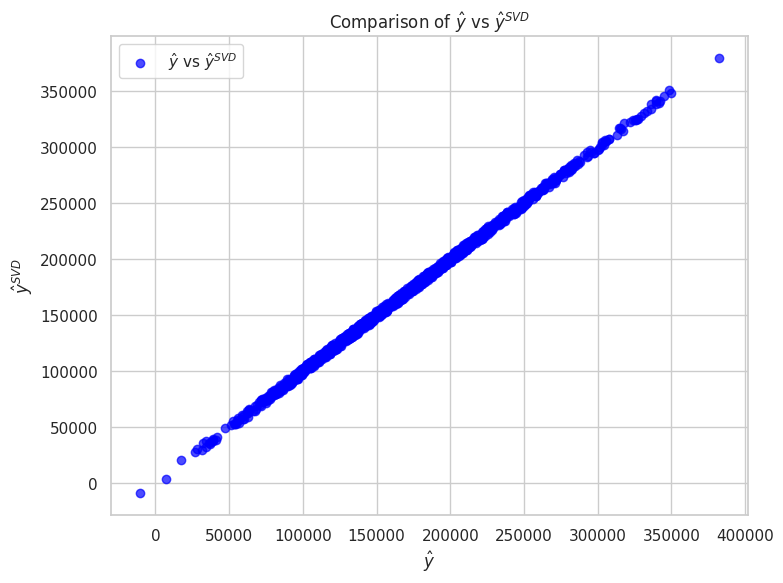

In [ ]:
# 2. Plot y_hat and y_hat_SVD over the same panel
plt.figure(figsize=(8,6))
plt.scatter(y_hat, y_hat_SVD, alpha=0.7, marker='o', color='blue', label='$\hat{y}$ vs $\hat{y}^{SVD}$')
plt.xlabel('$\hat{y}$')
plt.ylabel('$\hat{y}^{SVD}$')
plt.title('Comparison of $\hat{y}$ vs $\hat{y}^{SVD}$')
plt.legend()
plt.tight_layout()
plt.show()

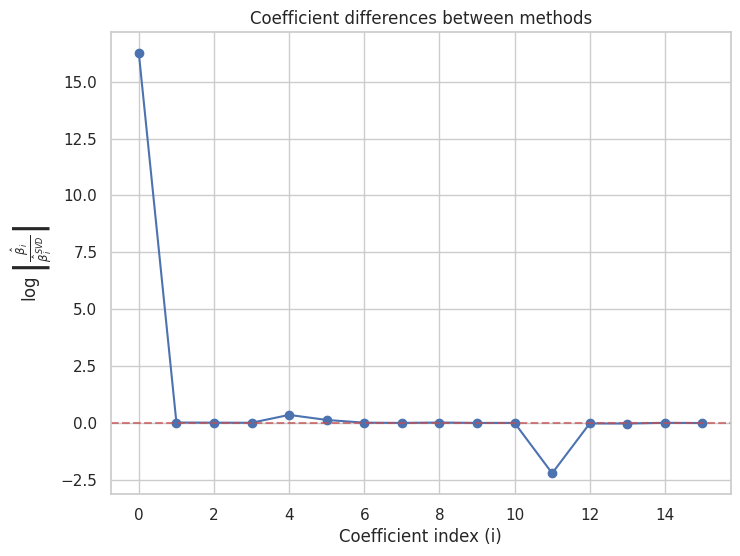

3. The covariate with the largest difference is: const


In [ ]:
# 3. Plot log(|beta_hat_i / beta_hat_SVD_i|)
ratio = np.abs(beta_hat / beta_hat_SVD)
log_ratio = np.log(ratio)

plt.figure(figsize=(8,6))
plt.plot(log_ratio, 'o-')
plt.xlabel('Coefficient index (i)')
plt.ylabel(r'$\log\left|\frac{\hat{\beta}_i}{\hat{\beta}_i^{SVD}}\right|$')
plt.title('Coefficient differences between methods')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.7)
plt.show()

# Identify the covariate with largest difference
max_diff_index = np.argmax(log_ratio)
covariate_with_largest_diff = X.columns[max_diff_index]
print("3. The covariate with the largest difference is:", covariate_with_largest_diff)